## Tutorial 1:  Introduction

##### NumPy

In [30]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


##### matplotlib

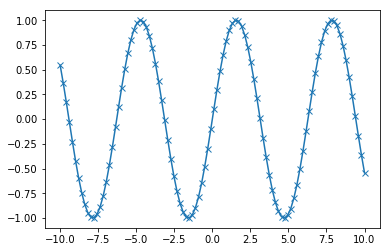

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

##### pandas

In [32]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [33]:
# One of many possible ways to query the table:
# selecting all rows that have an age column greate than 30
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


#### Versions 

In [34]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
pandas version: 0.20.1
matplotlib version: 2.0.2
NumPy version: 1.12.1
IPython version: 5.3.0
scikit-learn version: 0.18.1


### A First Application: Classifying iris species
<img src="images/iris_petal_sepal.png" width="300" height="300" />
#### Meet the data

In [35]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [36]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [37]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [38]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [39]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [40]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [41]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [42]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [43]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [44]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [45]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and testing data

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [47]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [48]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### First things first: Look at your data

/home/xhx/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9ce5f7e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa9c7d92320>]], dtype=object)

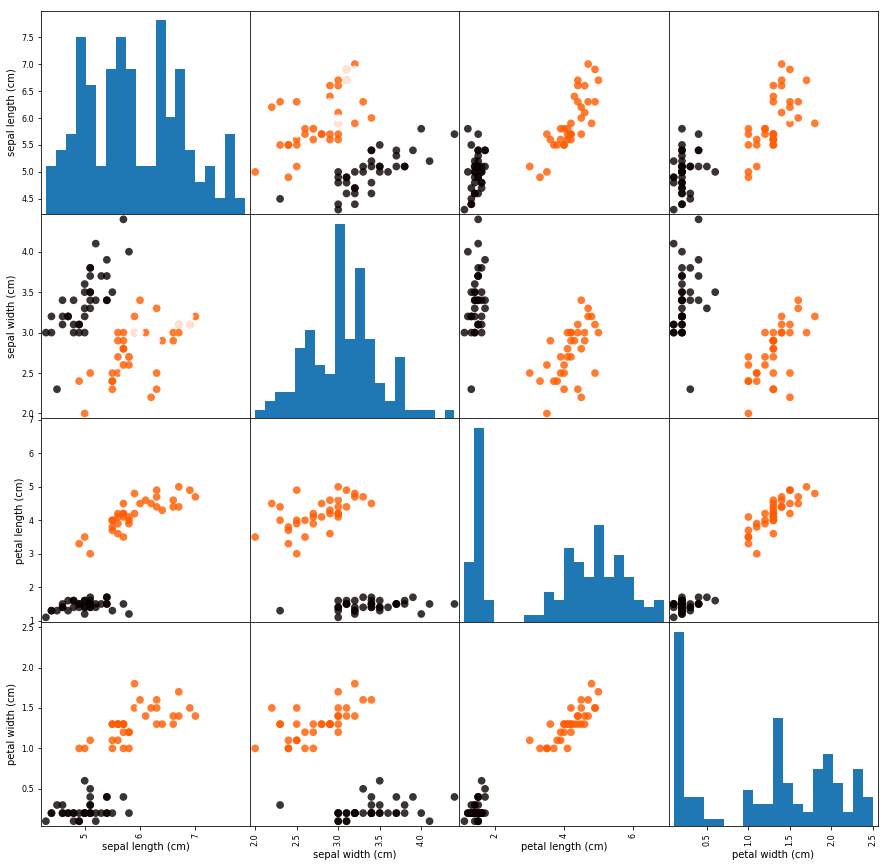

In [49]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.tools.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='hot')

#### Building your first model: k nearest neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Making predictions

In [52]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [53]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the model

In [54]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [55]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [56]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_train, y_train)))

Test set score: 1.00


### Exercise 1

#### 1. Calculate the score on testing data

#### 2. Rerun the predictor with difference choices of n_neighbors.  Compare test scores. Which number is the best?